In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['kvasir-dataset-v2']


In [2]:

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)



import pandas as pd 
pd.options.display.max_columns = 100

import numpy as np 


from PIL import Image
from scipy import ndimage

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)


sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

import cv2
import glob
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, Adadelta, Adamax
from keras.utils import to_categorical
from matplotlib import pyplot




Using TensorFlow backend.


In [3]:
images1 = []
targets1 = []



path1 = "../input/kvasir-dataset-v2/kvasir-dataset-v2/dyed-lifted-polyps"
path2 = "../input/kvasir-dataset-v2/kvasir-dataset-v2/dyed-resection-margins"
path3 = "../input/kvasir-dataset-v2/kvasir-dataset-v2/esophagitis"
path4 = "../input/kvasir-dataset-v2/kvasir-dataset-v2/normal-cecum"
path5 = "../input/kvasir-dataset-v2/kvasir-dataset-v2/normal-pylorus"
path6 = "../input/kvasir-dataset-v2/kvasir-dataset-v2/normal-z-line"
path7 = "../input/kvasir-dataset-v2/kvasir-dataset-v2/polyps"
path8 = "../input/kvasir-dataset-v2/kvasir-dataset-v2/ulcerative-colitis"



for i in glob.glob(os.path.join(path1,'*jpg')):
    img = cv2.imread(i)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(0)
    
for j in glob.glob(os.path.join(path2,'*jpg')):
    img = cv2.imread(j)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(1)    
    
    
for k in glob.glob(os.path.join(path3,'*jpg')):
    img = cv2.imread(k)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(2)
    
for l in glob.glob(os.path.join(path4,'*jpg')):
    img = cv2.imread(l)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(3)    
    
    
for m in glob.glob(os.path.join(path5,'*jpg')):
    img = cv2.imread(m)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(4)
    
for n in glob.glob(os.path.join(path6,'*jpg')):
    img = cv2.imread(n)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(5)    
    
for o in glob.glob(os.path.join(path7,'*jpg')):
    img = cv2.imread(o)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(6)
    
for p in glob.glob(os.path.join(path8,'*jpg')):
    img = cv2.imread(p)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(7)       
    
    




In [4]:
endoscope_images1 , endoscope_labels1 = np.array(images1), np.array(targets1)    
np.save("endoscope_images1",endoscope_images1)
np.save("endoscope_labels1",endoscope_labels1)

In [5]:
the_endoscope_images1, the_endoscope_labels1 = np.load("endoscope_images1.npy") , np.load("endoscope_labels1.npy")


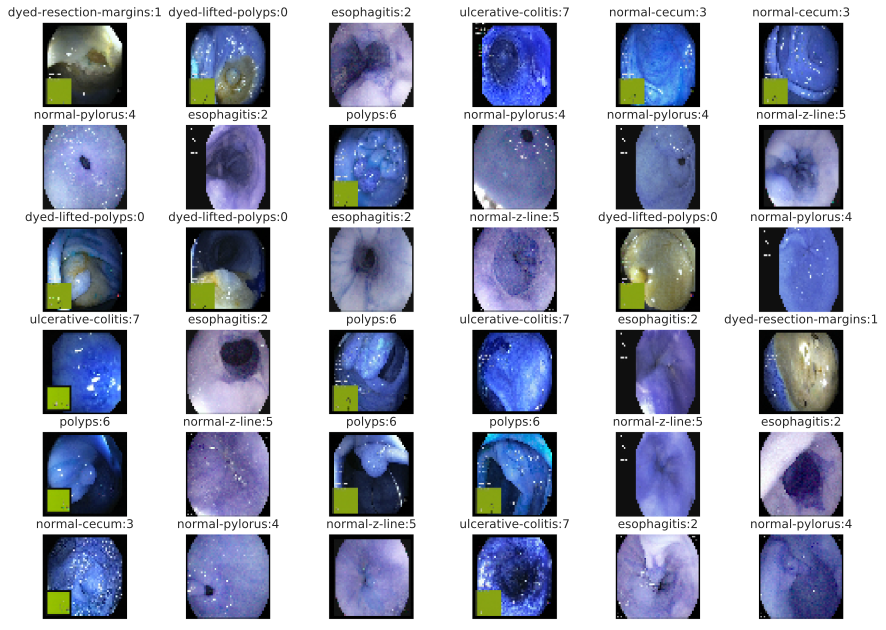

In [6]:
fig=plt.figure(figsize=(15, 11))
n = 36
for i in range(n):
    img = np.random.randint(0, the_endoscope_images1.shape[0] , 1)
    fig.add_subplot(n**(.5), n**(.5), i+1)
    plt.imshow(the_endoscope_images1[img[0]])

    plt.title('{}:{}' .format('dyed-lifted-polyps' if the_endoscope_labels1[img[0]]==0 else 'dyed-resection-margins' if the_endoscope_labels1[img[0]]==1 else 'esophagitis' if the_endoscope_labels1[img[0]]==2 else 'normal-cecum' if the_endoscope_labels1[img[0]]==3 else 'normal-pylorus' if the_endoscope_labels1[img[0]]==4 else 'normal-z-line' if the_endoscope_labels1[img[0]]==5 else 'polyps' if the_endoscope_labels1[img[0]]==6  else 'ulcerative-colitis' ,the_endoscope_labels1[img[0]]) )

    plt.xticks([]) , plt.yticks([])
        
plt.show()


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(the_endoscope_images1, the_endoscope_labels1, test_size=0.2)
    
    #converting to float and normalizing
X_train = X_train.astype('float32')/255 
X_test = X_test.astype('float32')/255
    
    #getting the numbr of unique classes in the labels
#num_classes=len(np.unique(the_endoscope_labels1))

num_classes = 8
    
    
#     #One hot encoding as classifier since we  has multiple classes
Y_train=keras.utils.to_categorical(Y_train,num_classes)
Y_test=keras.utils.to_categorical(Y_test,num_classes )


# Neural Network Models

### Fully connected neural network

In [8]:
from keras.layers import Dense, Activation


nnmodel = Sequential()
nnmodel.add(Dense(32, input_shape=(50,50,3)))
nnmodel.add(Activation('relu'))
nnmodel.add(Flatten())
nnmodel.add(Dense(8,activation="softmax")) 
nnmodel.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50, 50, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 640008    
Total params: 640,136
Trainable params: 640,136
Non-trainable params: 0
_________________________________________________________________


In [9]:
nnmodel.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['mae', 'acc'])

nnhistory =nnmodel.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1)


Instructions for updating:
Use tf.cast instead.
Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 2s 375us/step - loss: 1.1761 - mean_absolute_error: 0.1483 - acc: 0.5494 - val_loss: 0.8780 - val_mean_absolute_error: 0.1249 - val_acc: 0.6144
Epoch 2/10
6400/6400 [==============================] - 1s 125us/step - loss: 0.8204 - mean_absolute_error: 0.1199 - acc: 0.6419 - val_loss: 0.8753 - val_mean_absolute_error: 0.1151 - val_acc: 0.6050
Epoch 3/10
6400/6400 [==============================] - 1s 131us/step - loss: 0.7444 - mean_absolute_error: 0.1100 - acc: 0.6820 - val_loss: 0.7238 - val_mean_absolute_error: 0.1069 - val_acc: 0.6781
Epoch 4/10
6400/6400 [==============================] - 1s 129us/step - loss: 0.7058 - mean_absolute_error: 0.1050 - acc: 0.6905 - val_loss: 0.8400 - val_mean_absolute_error: 0.1169 - val_acc: 0.6256
Epoch 5/10
6400/6400 [==============================] - 1s 129us/step - loss: 0.6817 - mean_absolute_err

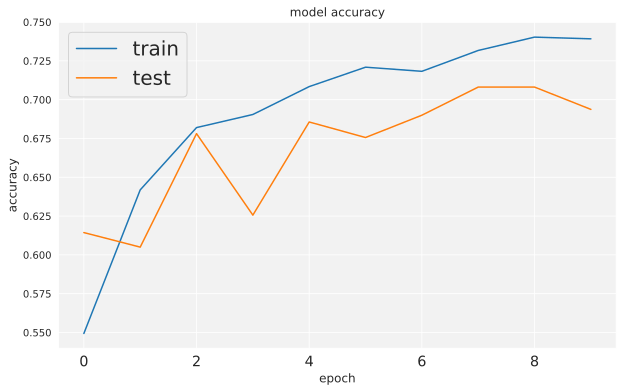

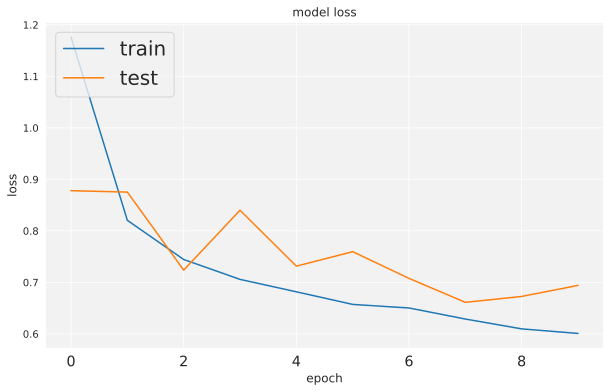

In [10]:
plt.figure(figsize=(10, 6))  

# summarize history for accuracy
plt.plot(nnhistory.history['acc'])
plt.plot(nnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test' ], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(10,6))
plt.plot(nnhistory.history['loss'])
plt.plot(nnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

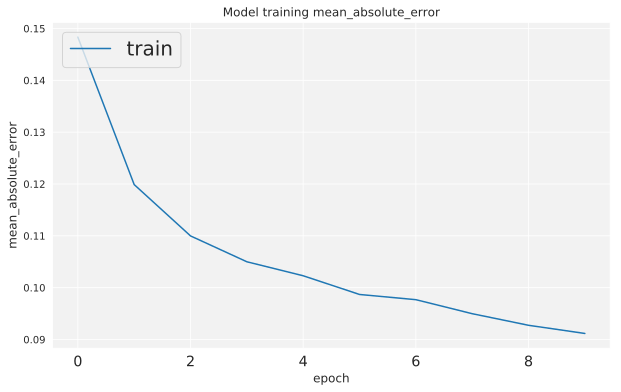

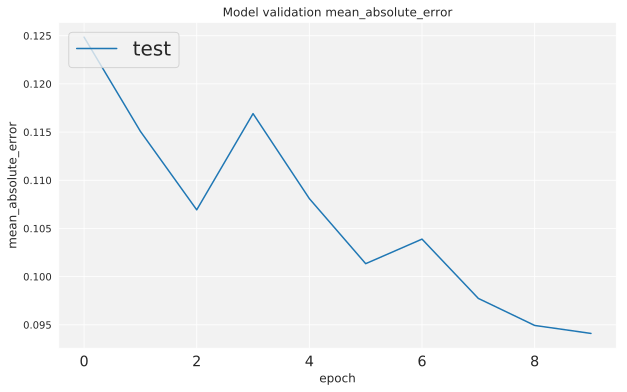

In [11]:
plt.figure(figsize=(10, 6))  

plt.plot(nnhistory.history['mean_absolute_error'])
plt.title('Model training mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))  

plt.plot(nnhistory.history['val_mean_absolute_error'])
plt.title('Model validation mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['test' ], loc='upper left')
plt.show()

In [12]:
from keras.layers import Dense, Activation
# import regularizer
from keras.regularizers import l1
# instantiate regularizer
reg = l1(0.001)

In [13]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(50,activation="relu"))
model.add(Dense(8,activation="softmax",activity_regularizer=l1(0.001)))#2 represent output layer neurons 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                230450    
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 408       
Total para

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['mae', 'acc'])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 2s 346us/step - loss: 1.6727 - mean_absolute_error: 0.1954 - acc: 0.4073 - val_loss: 1.2067 - val_mean_absolute_error: 0.1623 - val_acc: 0.5175
Epoch 2/10
6400/6400 [==============================] - 1s 135us/step - loss: 1.0005 - mean_absolute_error: 0.1384 - acc: 0.5934 - val_loss: 1.0397 - val_mean_absolute_error: 0.1319 - val_acc: 0.5244
Epoch 3/10
6400/6400 [==============================] - 1s 135us/step - loss: 0.8731 - mean_absolute_error: 0.1222 - acc: 0.6328 - val_loss: 0.8110 - val_mean_absolute_error: 0.1166 - val_acc: 0.6600
Epoch 4/10
6400/6400 [==============================] - 1s 135us/step - loss: 0.8069 - mean_absolute_error: 0.1141 - acc: 0.6511 - val_loss: 0.7918 - val_mean_absolute_error: 0.1152 - val_acc: 0.6600
Epoch 5/10
6400/6400 [==============================] - 1s 136us/step - loss: 0.7621 - mean_absolute_error: 0.1087 - acc: 0.6784 - val_loss: 0.7577 - va

# Plotting the Loss and Accuracy

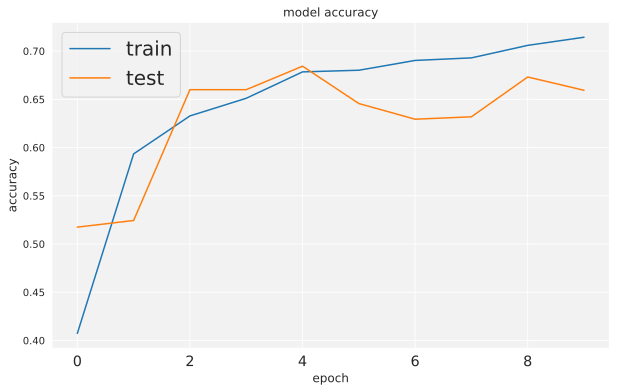

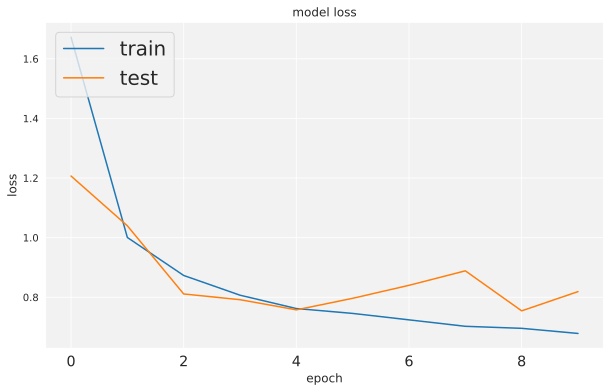

In [15]:
# summarize history for accuracy
plt.figure(figsize=(10, 6))  

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(10, 6))  

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

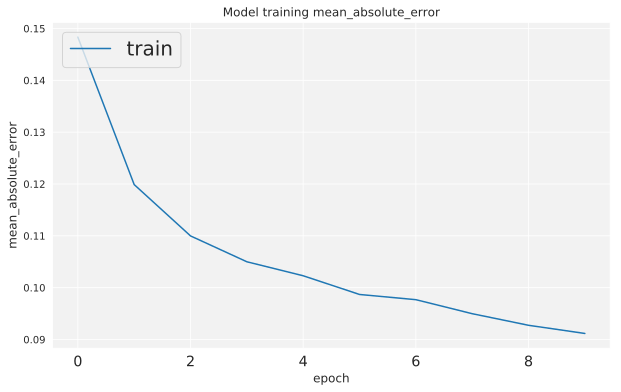

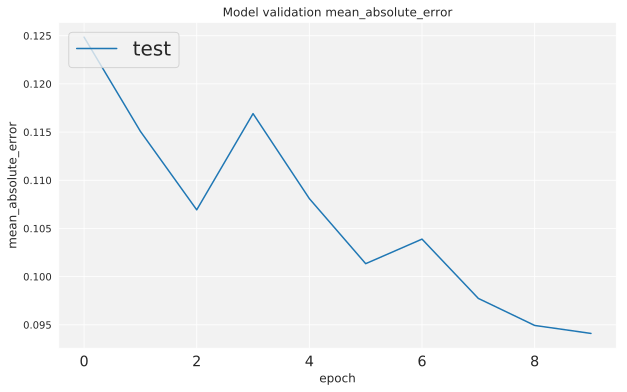

In [16]:
plt.figure(figsize=(10, 6))  

plt.plot(nnhistory.history['mean_absolute_error'])
plt.title('Model training mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))  

plt.plot(nnhistory.history['val_mean_absolute_error'])
plt.title('Model validation mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['test' ], loc='upper left')
plt.show()

## Confusion matrix and classification report

In [17]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1) 
y_true = Y_test
y_true=np.argmax(y_true, axis=1) 


print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       0.66      0.21      0.32       192
           1       0.52      0.91      0.66       183
           2       0.63      0.76      0.69       201
           3       0.87      0.74      0.80       223
           4       0.95      0.67      0.78       206
           5       0.57      0.65      0.61       222
           6       0.57      0.68      0.62       187
           7       0.74      0.67      0.70       186

   micro avg       0.66      0.66      0.66      1600
   macro avg       0.69      0.66      0.65      1600
weighted avg       0.69      0.66      0.65      1600



In [18]:
#Making confusion matrix that checks accuracy of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 40, 148,   0,   0,   0,   0,   4,   0],
       [ 16, 166,   0,   0,   0,   0,   1,   0],
       [  0,   0, 152,   0,   0,  49,   0,   0],
       [  0,   1,   0, 164,   0,   0,  50,   8],
       [  0,   0,  12,   0, 137,  55,   2,   0],
       [  0,   1,  75,   0,   0, 145,   0,   1],
       [  5,   2,   1,  11,   3,   3, 127,  35],
       [  0,   2,   1,  13,   4,   2,  40, 124]])

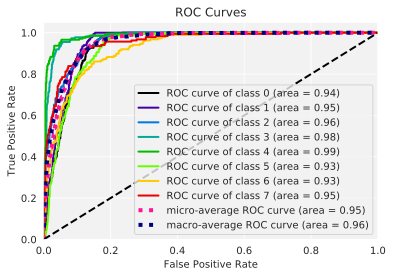

<Figure size 3600x360 with 0 Axes>

In [19]:
import scikitplot 
%matplotlib inline

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
y_probas = model.predict(X_test)
scikitplot.metrics.plot_roc(y_true, y_probas)
plt.figure(figsize=(50, 5)) 
#plt.legend(fontsize = 'xx-small')
plt.show()

In [20]:
plt.savefig('KvasirCnnROCcurve.png')

<Figure size 432x288 with 0 Axes>

# Variations of the models for Hyperparameter Optimization

view how the models loss and accuracy and loss changes
1. fcn2layer, lr = 0.01, beta = 0,reg=0, epochs = 10
2. fcn2layer+reg, lr = 0.01, beta = 0,reg=0.001, epochs = 10
3. fcn2layer+lr1, lr = 0.001, beta = 0,reg=0, epochs = 10
4. fcn2layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10
5. fcn3layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10
6. fcn3layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10
7. fcn4layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10

and also when the nodes changes
1. fcn2layer, nodes = 32
2. fcn2layer, nodes = 64
3. fcn2layer, nodes = 128


In [21]:
# import regularizer
from keras.layers import  Dropout, BatchNormalization

from keras.regularizers import l1,l2
# instantiate regularizer
reg = l1(0.001)
reg2 = l2(0.001)

In [22]:
nn1model = Sequential()
nn1model.add(Dense(32, input_shape=(50,50,3)))
nn1model.add(Activation('relu'))
# nn1model.add(Dense(64, activation="relu"))
# nn1model.add(Dense(128, activation="relu"))
# nn1model.add(Dense(512, activation="relu"))
nn1model.add(Flatten())
nn1model.add(Dense(8,activation="softmax", activity_regularizer=l1(0.001))) 
#nn1model.summary()

nn1model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.01),metrics=['accuracy'])

nn1history =nn1model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, verbose=1)

Train on 6400 samples, validate on 1600 samples
Epoch 1/300
6400/6400 [==============================] - 1s 175us/step - loss: 1.2159 - acc: 0.5202 - val_loss: 0.9002 - val_acc: 0.6438
Epoch 2/300
6400/6400 [==============================] - 1s 127us/step - loss: 0.8583 - acc: 0.6470 - val_loss: 0.8053 - val_acc: 0.6531
Epoch 3/300
6400/6400 [==============================] - 1s 127us/step - loss: 0.7765 - acc: 0.6816 - val_loss: 0.7959 - val_acc: 0.6706
Epoch 4/300
6400/6400 [==============================] - 1s 127us/step - loss: 0.7375 - acc: 0.6902 - val_loss: 0.7528 - val_acc: 0.6831
Epoch 5/300
6400/6400 [==============================] - 1s 130us/step - loss: 0.7119 - acc: 0.7075 - val_loss: 0.7386 - val_acc: 0.6731
Epoch 6/300
6400/6400 [==============================] - 1s 127us/step - loss: 0.6947 - acc: 0.7113 - val_loss: 0.7424 - val_acc: 0.7037
Epoch 7/300
6400/6400 [==============================] - 1s 129us/step - loss: 0.6732 - acc: 0.7273 - val_loss: 0.7819 - val_acc: 

In [23]:
nn1model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50, 50, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 640008    
Total params: 640,136
Trainable params: 640,136
Non-trainable params: 0
_________________________________________________________________


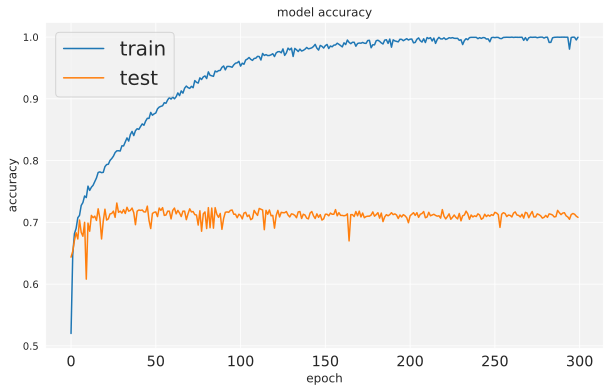

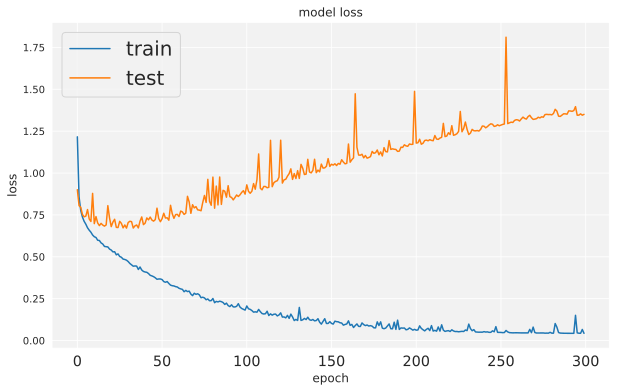

In [24]:
plt.figure(figsize=(10, 6))  


# summarize history for accuracy
plt.plot(nn1history.history['acc'])
plt.plot(nn1history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test' ], loc='upper left')
plt.show()
plt.figure(figsize=(10, 6))  

# summarize history for loss
plt.plot(nn1history.history['loss'])
plt.plot(nn1history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
score = nn1model.evaluate(X_test, Y_test, verbose=1)
print('\n', 'Test_Loss:-', score[0])
print('\n', 'Test_Accuracy:-', score[1])

1600/1600 [==============================] - 0s 75us/step

 Test_Loss:- 1.3502669405937195

 Test_Accuracy:- 0.708125


In [26]:
from keras.layers import  Dropout, BatchNormalization

In [27]:
cnn1model = Sequential()
cnn1model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
#cnn1model.add(BatchNormalization())
cnn1model.add(MaxPooling2D(pool_size=2))
#cnn1model.add(Dropout(0.5))      
cnn1model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
#cnn1model.add(BatchNormalization())
cnn1model.add(MaxPooling2D(pool_size=2))
#cnn1model.add(Dropout(0.5))      
cnn1model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
cnn1model.add(MaxPooling2D(pool_size=2))
#cnn1model.add(BatchNormalization())
#cnn1model.add(Dropout(0.25))      
cnn1model.add(Flatten())
cnn1model.add(Dense(50,activation="relu"))
cnn1model.add(Dense(8,activation="softmax" ,kernel_regularizer=l2(0.01))) #,activity_regularizer=l1(0.01)))
#cnn1model.summary()
cnn1model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
cnn1history = cnn1model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, verbose=1)

Train on 6400 samples, validate on 1600 samples
Epoch 1/300
6400/6400 [==============================] - 1s 206us/step - loss: 2.1111 - acc: 0.2881 - val_loss: 1.8440 - val_acc: 0.4487
Epoch 2/300
6400/6400 [==============================] - 1s 144us/step - loss: 1.3945 - acc: 0.5164 - val_loss: 1.1051 - val_acc: 0.5925
Epoch 3/300
6400/6400 [==============================] - 1s 144us/step - loss: 1.0941 - acc: 0.5833 - val_loss: 1.1747 - val_acc: 0.5169
Epoch 4/300
6400/6400 [==============================] - 1s 143us/step - loss: 0.9862 - acc: 0.6206 - val_loss: 1.1945 - val_acc: 0.5337
Epoch 5/300
6400/6400 [==============================] - 1s 144us/step - loss: 0.9376 - acc: 0.6406 - val_loss: 0.9237 - val_acc: 0.6456
Epoch 6/300
6400/6400 [==============================] - 1s 141us/step - loss: 0.8855 - acc: 0.6553 - val_loss: 0.9127 - val_acc: 0.6525
Epoch 7/300
6400/6400 [==============================] - 1s 143us/step - loss: 0.8602 - acc: 0.6650 - val_loss: 0.8667 - val_acc: 

In [28]:
cnn1model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
__________

In [29]:
score1 = cnn1model.evaluate(X_test, Y_test, verbose=1)
print('\n', 'Test_Loss:-', score1[0])
print('\n', 'Test_Accuracy:-', score1[1])

1600/1600 [==============================] - 0s 61us/step

 Test_Loss:- 1.57641290307045

 Test_Accuracy:- 0.715


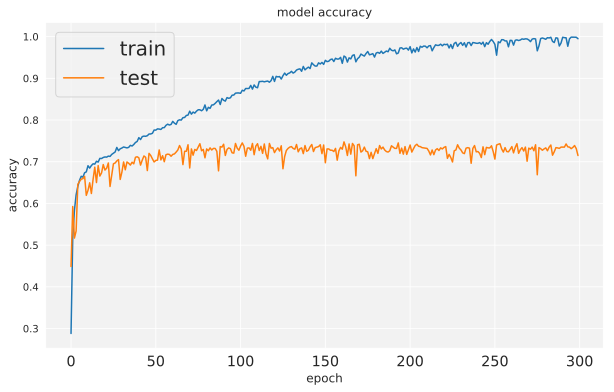

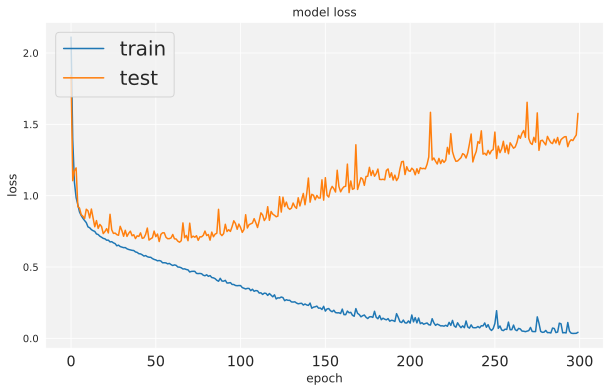

In [30]:
plt.figure(figsize=(10, 6))  

# summarize history for accuracy
plt.plot(cnn1history.history['acc'])
plt.plot(cnn1history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test' ], loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))  

# summarize history for loss
plt.plot(cnn1history.history['loss'])
plt.plot(cnn1history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

# Comparing Several Keras Optimizers

In [31]:
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

## Optimizer 1: RMSprop

In [32]:
cnnmodel_rmsprop = Sequential()
cnnmodel_rmsprop.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_rmsprop.add(MaxPooling2D(pool_size=2))
cnnmodel_rmsprop.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_rmsprop.add(MaxPooling2D(pool_size=2))
cnnmodel_rmsprop.add(Flatten())
cnnmodel_rmsprop.add(Dense(50,activation="relu"))
cnnmodel_rmsprop.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_rmsprop.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, verbose=1, callbacks=[reduce_lr])


Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 1s 205us/step - loss: 0.2064 - acc: 0.9004 - val_loss: 0.1769 - val_acc: 0.9116
Epoch 2/30
6400/6400 [==============================] - 1s 144us/step - loss: 0.1615 - acc: 0.9225 - val_loss: 0.1500 - val_acc: 0.9313
Epoch 3/30
6400/6400 [==============================] - 1s 143us/step - loss: 0.1476 - acc: 0.9298 - val_loss: 0.1524 - val_acc: 0.9260
Epoch 4/30
6400/6400 [==============================] - 1s 142us/step - loss: 0.1376 - acc: 0.9362 - val_loss: 0.1405 - val_acc: 0.9326
Epoch 5/30
6400/6400 [==============================] - 1s 141us/step - loss: 0.1296 - acc: 0.9394 - val_loss: 0.1386 - val_acc: 0.9359
Epoch 6/30
6400/6400 [==============================] - 1s 143us/step - loss: 0.1239 - acc: 0.9452 - val_loss: 0.1413 - val_acc: 0.9336
Epoch 7/30
6400/6400 [==============================] - 1s 142us/step - loss: 0.1171 - acc: 0.9476 - val_loss: 0.1369 - val_acc: 0.9394


## Optimizer 2: Adam

In [33]:
cnnmodel_adam = Sequential()
cnnmodel_adam.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_adam.add(MaxPooling2D(pool_size=2))
cnnmodel_adam.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_adam.add(MaxPooling2D(pool_size=2))
cnnmodel_adam.add(Flatten())
cnnmodel_adam.add(Dense(50,activation="relu"))
cnnmodel_adam.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
cnnmodel_adam.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
hist_adam = cnnmodel_adam.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, verbose=1, callbacks=[reduce_lr])


Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 1s 233us/step - loss: 0.2032 - acc: 0.9065 - val_loss: 0.1697 - val_acc: 0.9190
Epoch 2/30
6400/6400 [==============================] - 1s 153us/step - loss: 0.1558 - acc: 0.9271 - val_loss: 0.1663 - val_acc: 0.9228
Epoch 3/30
6400/6400 [==============================] - 1s 153us/step - loss: 0.1428 - acc: 0.9341 - val_loss: 0.1521 - val_acc: 0.9302
Epoch 4/30
6400/6400 [==============================] - 1s 153us/step - loss: 0.1340 - acc: 0.9374 - val_loss: 0.1480 - val_acc: 0.9327
Epoch 5/30
6400/6400 [==============================] - 1s 152us/step - loss: 0.1266 - acc: 0.9412 - val_loss: 0.1438 - val_acc: 0.9310
Epoch 6/30
6400/6400 [==============================] - 1s 152us/step - loss: 0.1209 - acc: 0.9447 - val_loss: 0.1471 - val_acc: 0.9309
Epoch 7/30
6400/6400 [==============================] - 1s 153us/step - loss: 0.1152 - acc: 0.9475 - val_loss: 0.1426 - val_acc: 0.9339


## Optimizer 3: Nadam

In [34]:
cnnmodel_nadam = Sequential()
cnnmodel_nadam.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_nadam.add(MaxPooling2D(pool_size=2))
cnnmodel_nadam.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_nadam.add(MaxPooling2D(pool_size=2))
cnnmodel_nadam.add(Flatten())
cnnmodel_nadam.add(Dense(50,activation="relu"))
cnnmodel_nadam.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
cnnmodel_nadam.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])
hist_nadam = cnnmodel_nadam.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, verbose=1, callbacks=[reduce_lr])


Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 2s 259us/step - loss: 0.2121 - acc: 0.9021 - val_loss: 0.1592 - val_acc: 0.9260
Epoch 2/30
6400/6400 [==============================] - 1s 164us/step - loss: 0.1568 - acc: 0.9254 - val_loss: 0.1473 - val_acc: 0.9290
Epoch 3/30
6400/6400 [==============================] - 1s 167us/step - loss: 0.1398 - acc: 0.9335 - val_loss: 0.1420 - val_acc: 0.9313
Epoch 4/30
6400/6400 [==============================] - 1s 165us/step - loss: 0.1310 - acc: 0.9391 - val_loss: 0.1422 - val_acc: 0.9334
Epoch 5/30
6400/6400 [==============================] - 1s 166us/step - loss: 0.1271 - acc: 0.9424 - val_loss: 0.1562 - val_acc: 0.9277
Epoch 6/30
6400/6400 [==============================] - 1s 167us/step - loss: 0.1168 - acc: 0.9471 - val_loss: 0.1397 - val_acc: 0.9362
Epoch 7/30
6400/6400 [==============================] - 1s 169us/step - loss: 0.1122 - acc: 0.9480 - val_loss: 0.1410 - val_acc: 0.9339


## Optimizer : SGD

In [35]:
cnnmodel_sgd= Sequential()
cnnmodel_sgd.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_sgd.add(MaxPooling2D(pool_size=2))
cnnmodel_sgd.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_sgd.add(MaxPooling2D(pool_size=2))
cnnmodel_sgd.add(Flatten())
cnnmodel_sgd.add(Dense(50,activation="relu"))
cnnmodel_sgd.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_sgd.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_sgd = cnnmodel_sgd.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, verbose=1, callbacks=[reduce_lr])



Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 1s 219us/step - loss: 0.3660 - acc: 0.8750 - val_loss: 0.3572 - val_acc: 0.8750
Epoch 2/30
6400/6400 [==============================] - 1s 137us/step - loss: 0.3484 - acc: 0.8750 - val_loss: 0.3380 - val_acc: 0.8750
Epoch 3/30
6400/6400 [==============================] - 1s 136us/step - loss: 0.3257 - acc: 0.8753 - val_loss: 0.3116 - val_acc: 0.8762
Epoch 4/30
6400/6400 [==============================] - 1s 136us/step - loss: 0.2965 - acc: 0.8774 - val_loss: 0.2817 - val_acc: 0.8788
Epoch 5/30
6400/6400 [==============================] - 1s 136us/step - loss: 0.2646 - acc: 0.8811 - val_loss: 0.2496 - val_acc: 0.8828
Epoch 6/30
6400/6400 [==============================] - 1s 136us/step - loss: 0.2360 - acc: 0.8893 - val_loss: 0.2279 - val_acc: 0.8987
Epoch 7/30
6400/6400 [==============================] - 1s 135us/step - loss: 0.2152 - acc: 0.8992 - val_loss: 0.2102 - val_acc: 0.9044


## Optimizer 5: SGD + Nesterov

In [36]:
cnnmodel_sgdnesterov = Sequential()
cnnmodel_sgdnesterov.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_sgdnesterov.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnesterov.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_sgdnesterov.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnesterov.add(Flatten())
cnnmodel_sgdnesterov.add(Dense(50,activation="relu"))
cnnmodel_sgdnesterov.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_sgdnesterov.compile(optimizer=SGD(nesterov=True), loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_sgdnesterov = cnnmodel_sgdnesterov.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, verbose=1, callbacks=[reduce_lr])


Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 1s 230us/step - loss: 0.3725 - acc: 0.8750 - val_loss: 0.3642 - val_acc: 0.8750
Epoch 2/30
6400/6400 [==============================] - 1s 139us/step - loss: 0.3580 - acc: 0.8750 - val_loss: 0.3478 - val_acc: 0.8750
Epoch 3/30
6400/6400 [==============================] - 1s 138us/step - loss: 0.3386 - acc: 0.8750 - val_loss: 0.3239 - val_acc: 0.8750
Epoch 4/30
6400/6400 [==============================] - 1s 140us/step - loss: 0.3099 - acc: 0.8753 - val_loss: 0.2891 - val_acc: 0.8757
Epoch 5/30
6400/6400 [==============================] - 1s 138us/step - loss: 0.2719 - acc: 0.8789 - val_loss: 0.2506 - val_acc: 0.8844
Epoch 6/30
6400/6400 [==============================] - 1s 139us/step - loss: 0.2356 - acc: 0.8894 - val_loss: 0.2237 - val_acc: 0.8975
Epoch 7/30
6400/6400 [==============================] - 1s 139us/step - loss: 0.2127 - acc: 0.9003 - val_loss: 0.2058 - val_acc: 0.9018


## Optimizer 6: SGD with momentum=0.9

In [37]:
cnnmodel_sgdmomentum = Sequential()
cnnmodel_sgdmomentum.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_sgdmomentum.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdmomentum.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_sgdmomentum.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdmomentum.add(Flatten())
cnnmodel_sgdmomentum.add(Dense(50,activation="relu"))
cnnmodel_sgdmomentum.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_sgdmomentum.compile(optimizer=SGD(momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_sgdmomentum = cnnmodel_sgdmomentum.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, verbose=1, callbacks=[reduce_lr])



Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 1s 233us/step - loss: 0.3195 - acc: 0.8782 - val_loss: 0.2218 - val_acc: 0.9009
Epoch 2/30
6400/6400 [==============================] - 1s 137us/step - loss: 0.1995 - acc: 0.9043 - val_loss: 0.1764 - val_acc: 0.9155
Epoch 3/30
6400/6400 [==============================] - 1s 135us/step - loss: 0.1762 - acc: 0.9142 - val_loss: 0.1752 - val_acc: 0.9155
Epoch 4/30
6400/6400 [==============================] - 1s 136us/step - loss: 0.1667 - acc: 0.9205 - val_loss: 0.1788 - val_acc: 0.9152
Epoch 5/30
6400/6400 [==============================] - 1s 137us/step - loss: 0.1637 - acc: 0.9215 - val_loss: 0.1725 - val_acc: 0.9158
Epoch 6/30
6400/6400 [==============================] - 1s 136us/step - loss: 0.1613 - acc: 0.9224 - val_loss: 0.1657 - val_acc: 0.9231
Epoch 7/30
6400/6400 [==============================] - 1s 136us/step - loss: 0.1547 - acc: 0.9266 - val_loss: 0.1616 - val_acc: 0.9238


## Optimizer 7: SGD + Nesterov with momentum=0.9

In [38]:
cnnmodel_sgdnestmomentum = Sequential()
cnnmodel_sgdnestmomentum.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_sgdnestmomentum.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnestmomentum.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_sgdnestmomentum.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnestmomentum.add(Flatten())
cnnmodel_sgdnestmomentum.add(Dense(50,activation="relu"))
cnnmodel_sgdnestmomentum.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_sgdnestmomentum.compile(optimizer=SGD(momentum=0.9, nesterov=True), loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_sgdnestmomentum = cnnmodel_sgdnestmomentum.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, verbose=1, callbacks=[reduce_lr])


Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 2s 250us/step - loss: 0.3060 - acc: 0.8807 - val_loss: 0.2066 - val_acc: 0.9038
Epoch 2/30
6400/6400 [==============================] - 1s 141us/step - loss: 0.1885 - acc: 0.9094 - val_loss: 0.1846 - val_acc: 0.9158
Epoch 3/30
6400/6400 [==============================] - 1s 140us/step - loss: 0.1714 - acc: 0.9186 - val_loss: 0.1717 - val_acc: 0.9198
Epoch 4/30
6400/6400 [==============================] - 1s 141us/step - loss: 0.1645 - acc: 0.9203 - val_loss: 0.1638 - val_acc: 0.9220
Epoch 5/30
6400/6400 [==============================] - 1s 140us/step - loss: 0.1598 - acc: 0.9226 - val_loss: 0.1610 - val_acc: 0.9222
Epoch 6/30
6400/6400 [==============================] - 1s 139us/step - loss: 0.1548 - acc: 0.9255 - val_loss: 0.1658 - val_acc: 0.9229
Epoch 7/30
6400/6400 [==============================] - 1s 140us/step - loss: 0.1520 - acc: 0.9266 - val_loss: 0.1560 - val_acc: 0.9255


## Optimizer 8:Adagrad

In [39]:
cnnmodel_adagrad = Sequential()
cnnmodel_adagrad.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_adagrad.add(MaxPooling2D(pool_size=2))
cnnmodel_adagrad.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_adagrad.add(MaxPooling2D(pool_size=2))
cnnmodel_adagrad.add(Flatten())
cnnmodel_adagrad.add(Dense(50,activation="relu"))
cnnmodel_adagrad.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_adagrad.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_adagrad = cnnmodel_adagrad.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, verbose=1, callbacks=[reduce_lr])



Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 2s 276us/step - loss: 0.2177 - acc: 0.9017 - val_loss: 0.1628 - val_acc: 0.9216
Epoch 2/30
6400/6400 [==============================] - 1s 144us/step - loss: 0.1526 - acc: 0.9272 - val_loss: 0.1573 - val_acc: 0.9252
Epoch 3/30
6400/6400 [==============================] - 1s 144us/step - loss: 0.1374 - acc: 0.9376 - val_loss: 0.1463 - val_acc: 0.9291
Epoch 4/30
6400/6400 [==============================] - 1s 142us/step - loss: 0.1290 - acc: 0.9412 - val_loss: 0.1399 - val_acc: 0.9362
Epoch 5/30
6400/6400 [==============================] - 1s 143us/step - loss: 0.1228 - acc: 0.9462 - val_loss: 0.1394 - val_acc: 0.9365
Epoch 6/30
6400/6400 [==============================] - 1s 144us/step - loss: 0.1180 - acc: 0.9474 - val_loss: 0.1428 - val_acc: 0.9345
Epoch 7/30
6400/6400 [==============================] - 1s 141us/step - loss: 0.1141 - acc: 0.9493 - val_loss: 0.1367 - val_acc: 0.9373


## Optimizer 9: Adadelta

In [40]:
cnnmodel_adadelta = Sequential()
cnnmodel_adadelta.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_adadelta.add(MaxPooling2D(pool_size=2))
cnnmodel_adadelta.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_adadelta.add(MaxPooling2D(pool_size=2))
cnnmodel_adadelta.add(Flatten())
cnnmodel_adadelta.add(Dense(50,activation="relu"))
cnnmodel_adadelta.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_adadelta.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_adadelta = cnnmodel_adadelta.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, verbose=1, callbacks=[reduce_lr])


Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 2s 318us/step - loss: 0.2366 - acc: 0.8907 - val_loss: 0.2140 - val_acc: 0.8877
Epoch 2/30
6400/6400 [==============================] - 1s 165us/step - loss: 0.1783 - acc: 0.9127 - val_loss: 0.1638 - val_acc: 0.9205
Epoch 3/30
6400/6400 [==============================] - 1s 166us/step - loss: 0.1567 - acc: 0.9252 - val_loss: 0.1646 - val_acc: 0.9227
Epoch 4/30
6400/6400 [==============================] - 1s 164us/step - loss: 0.1464 - acc: 0.9306 - val_loss: 0.1578 - val_acc: 0.9241
Epoch 5/30
6400/6400 [==============================] - 1s 163us/step - loss: 0.1363 - acc: 0.9366 - val_loss: 0.1440 - val_acc: 0.9353
Epoch 6/30
6400/6400 [==============================] - 1s 163us/step - loss: 0.1325 - acc: 0.9385 - val_loss: 0.1590 - val_acc: 0.9213
Epoch 7/30
6400/6400 [==============================] - 1s 163us/step - loss: 0.1278 - acc: 0.9410 - val_loss: 0.1423 - val_acc: 0.9320


## Optimizer 10: Adamax

In [41]:
cnnmodel_adamax = Sequential()
cnnmodel_adamax.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_adamax.add(MaxPooling2D(pool_size=2))
cnnmodel_adamax.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_adamax.add(MaxPooling2D(pool_size=2))
cnnmodel_adamax.add(Flatten())
cnnmodel_adamax.add(Dense(50,activation="relu"))
cnnmodel_adamax.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_adamax.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_adamax = cnnmodel_adamax.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, verbose=1, callbacks=[reduce_lr])



Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 2s 301us/step - loss: 0.2166 - acc: 0.9029 - val_loss: 0.1687 - val_acc: 0.9177
Epoch 2/30
6400/6400 [==============================] - 1s 153us/step - loss: 0.1549 - acc: 0.9267 - val_loss: 0.1658 - val_acc: 0.9206
Epoch 3/30
6400/6400 [==============================] - 1s 151us/step - loss: 0.1429 - acc: 0.9338 - val_loss: 0.1577 - val_acc: 0.9251
Epoch 4/30
6400/6400 [==============================] - 1s 150us/step - loss: 0.1374 - acc: 0.9364 - val_loss: 0.1480 - val_acc: 0.9303
Epoch 5/30
6400/6400 [==============================] - 1s 151us/step - loss: 0.1298 - acc: 0.9411 - val_loss: 0.1486 - val_acc: 0.9287
Epoch 6/30
6400/6400 [==============================] - 1s 148us/step - loss: 0.1251 - acc: 0.9442 - val_loss: 0.1510 - val_acc: 0.9277
Epoch 7/30
6400/6400 [==============================] - 1s 149us/step - loss: 0.1205 - acc: 0.9455 - val_loss: 0.1388 - val_acc: 0.9366


# Plots of the optimizers

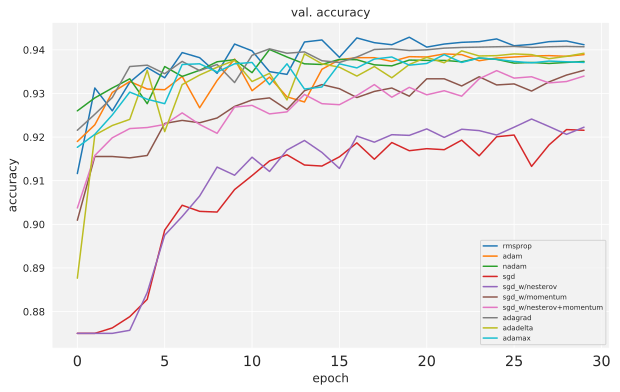

In [42]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0.4, 1))

plt.plot(hist_rmsprop.history['val_acc'])
plt.plot(hist_adam.history['val_acc'])
plt.plot(hist_nadam.history['val_acc'])
plt.plot(hist_sgd.history['val_acc'])
plt.plot(hist_sgdnesterov.history['val_acc'])
plt.plot(hist_sgdmomentum.history['val_acc'])
plt.plot(hist_sgdnestmomentum.history['val_acc'])
plt.plot(hist_adagrad.history['val_acc'])
plt.plot(hist_adadelta.history['val_acc'])
plt.plot(hist_adamax.history['val_acc'])
plt.title('val. accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov', 'sgd_w/momentum', 'sgd_w/nesterov+momentum', 'adagrad', 'adadelta', 'adamax'], loc='lower right', fontsize = 'x-small')  

plt.show()

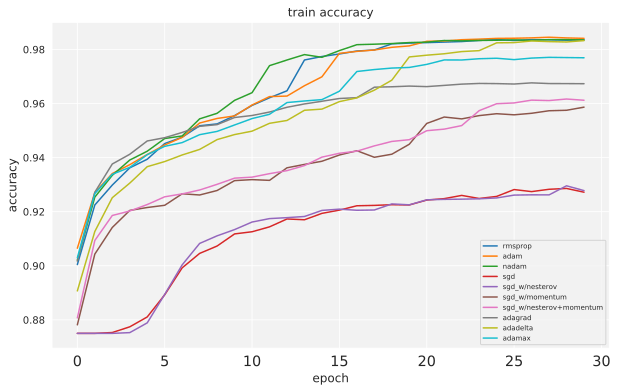

In [43]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0.4, 1))


plt.plot(hist_rmsprop.history['acc'])  
plt.plot(hist_adam.history['acc'])  
plt.plot(hist_nadam.history['acc']) 
plt.plot(hist_sgd.history['acc']) 
plt.plot(hist_sgdnesterov.history['acc']) 
plt.plot(hist_sgdmomentum.history['acc'])
plt.plot(hist_sgdnestmomentum.history['acc'])
plt.plot(hist_adagrad.history['acc'])
plt.plot(hist_adadelta.history['acc'])
plt.plot(hist_adamax.history['acc'])
plt.title('train accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov', 'sgd_w/momentum', 'sgd_w/nesterov+momentum', 'adagrad', 'adadelta', 'adamax'], loc='lower right', fontsize = 'x-small')  

plt.show()

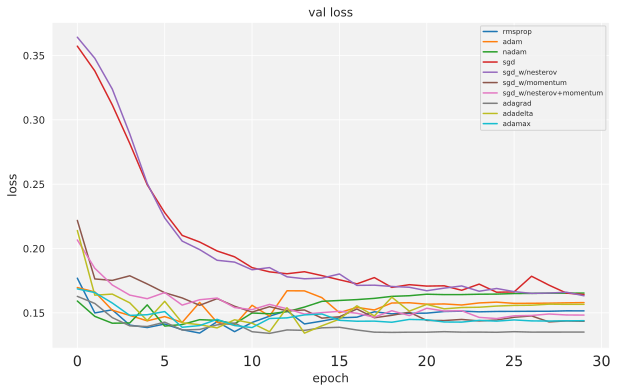

In [44]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0, 1))


plt.plot(hist_rmsprop.history['val_loss'])  
plt.plot(hist_adam.history['val_loss'])  
plt.plot(hist_nadam.history['val_loss']) 
plt.plot(hist_sgd.history['val_loss']) 
plt.plot(hist_sgdnesterov.history['val_loss']) 
plt.plot(hist_sgdmomentum.history['val_loss'])
plt.plot(hist_sgdnestmomentum.history['val_loss'])
plt.plot(hist_adagrad.history['val_loss'])
plt.plot(hist_adadelta.history['val_loss'])
plt.plot(hist_adamax.history['val_loss'])
plt.title('val loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov', 'sgd_w/momentum', 'sgd_w/nesterov+momentum', 'adagrad', 'adadelta', 'adamax'], loc='upper right', fontsize = 'x-small')  

plt.show()

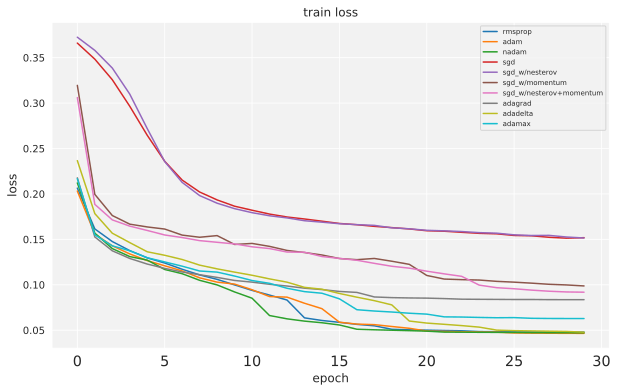

In [45]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0, 1))


plt.plot(hist_rmsprop.history['loss'])  
plt.plot(hist_adam.history['loss'])  
plt.plot(hist_nadam.history['loss']) 
plt.plot(hist_sgd.history['loss']) 
plt.plot(hist_sgdnesterov.history['loss']) 
plt.plot(hist_sgdmomentum.history['loss'])
plt.plot(hist_sgdnestmomentum.history['loss'])
plt.plot(hist_adagrad.history['loss'])
plt.plot(hist_adadelta.history['loss'])
plt.plot(hist_adamax.history['loss'])
plt.title('train loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov', 'sgd_w/momentum', 'sgd_w/nesterov+momentum', 'adagrad', 'adadelta', 'adamax'], loc='upper right',fontsize = 'x-small')  

plt.show()

# Showing just the best and the worst performing after some observations

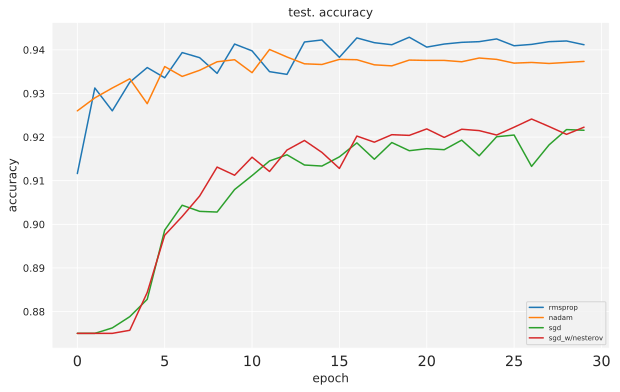

In [46]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0.4, 1))

plt.plot(hist_rmsprop.history['val_acc'])
plt.plot(hist_nadam.history['val_acc'])
plt.plot(hist_sgd.history['val_acc'])
plt.plot(hist_sgdnesterov.history['val_acc'])

plt.title('test. accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'nadam', 'sgd', 'sgd_w/nesterov'], loc='lower right', fontsize = 'x-small')  

plt.show()

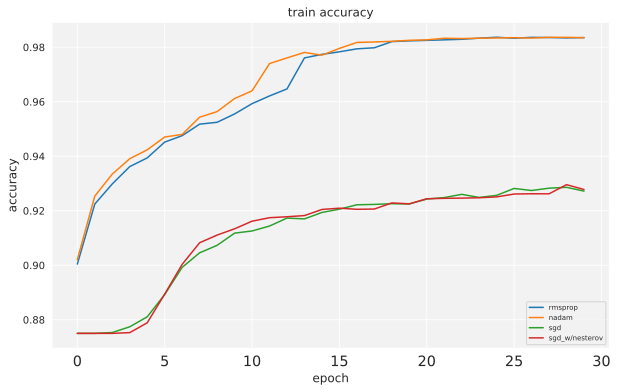

In [47]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0.4, 1))


plt.plot(hist_rmsprop.history['acc'])  
plt.plot(hist_nadam.history['acc']) 
plt.plot(hist_sgd.history['acc']) 
plt.plot(hist_sgdnesterov.history['acc']) 
plt.title('train accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'nadam', 'sgd', 'sgd_w/nesterov'], loc='lower right', fontsize = 'x-small')  

plt.show()

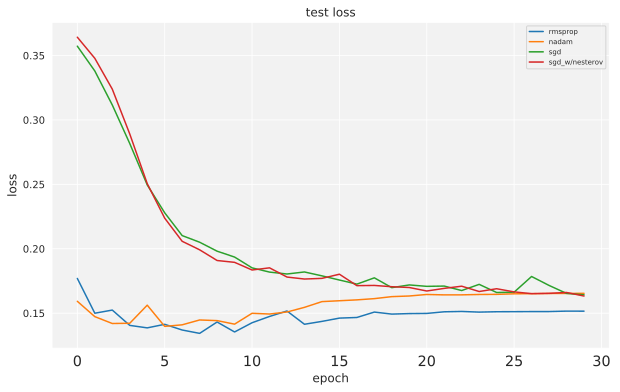

In [48]:
plt.figure(figsize=(10, 6))  


plt.plot(hist_rmsprop.history['val_loss'])  
plt.plot(hist_nadam.history['val_loss']) 
plt.plot(hist_sgd.history['val_loss']) 
plt.plot(hist_sgdnesterov.history['val_loss']) 

plt.title('test loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'nadam', 'sgd', 'sgd_w/nesterov'], loc='upper right', fontsize = 'x-small')  

plt.show()

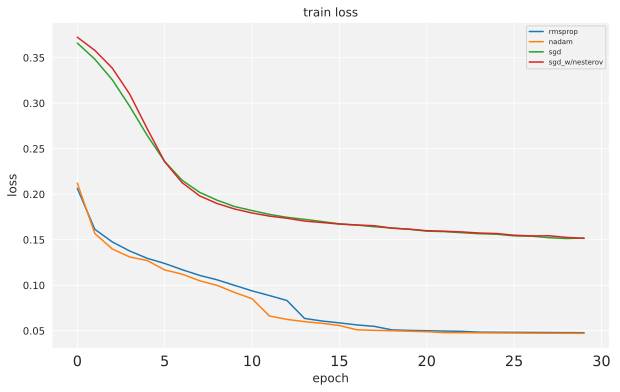

In [49]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0, 1))


plt.plot(hist_rmsprop.history['loss'])  
plt.plot(hist_nadam.history['loss']) 
plt.plot(hist_sgd.history['loss']) 
plt.plot(hist_sgdnesterov.history['loss']) 

plt.title('train loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'nadam', 'sgd', 'sgd_w/nesterov'], loc='upper right',fontsize = 'x-small')  

plt.show()

# A deeper model

In [50]:
cnndeepmodel = Sequential()
# first convolution layer
cnndeepmodel.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3))) 
cnndeepmodel.add(BatchNormalization())
cnndeepmodel.add(MaxPooling2D(pool_size=2))
cnndeepmodel.add(Dropout(0.25))

#second convolution  layer
cnndeepmodel.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnndeepmodel.add(BatchNormalization())
cnndeepmodel.add(MaxPooling2D(pool_size=2))
cnndeepmodel.add(Dropout(0.5))

#Third convolution  layer
cnndeepmodel.add(Conv2D(64, kernel_size=2 ,padding="same",activation='relu'))
cnndeepmodel.add(BatchNormalization())
cnndeepmodel.add(MaxPooling2D(pool_size=2))
cnndeepmodel.add(Dropout(0.5))

#first Fully connected layer
cnndeepmodel.add(Flatten()) 
cnndeepmodel.add(Dense(256,kernel_regularizer=l2(0.001)))#activity_regularizer=l1(0.001)))
cnndeepmodel.add(BatchNormalization())
cnndeepmodel.add(Activation('relu')) 
cnndeepmodel.add(Dropout(0.5))      

#Final Fully connected layer
cnndeepmodel.add(Dense(8)) 
cnndeepmodel.add(Activation('softmax')) 

cnndeepmodel.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

cnndeepmodel.summary()

cnndeephistory = cnndeepmodel.fit(X_train, Y_train, epochs=100,verbose=1,shuffle=True,callbacks=[reduce_lr])

cnnscore = cnndeepmodel.evaluate(X_test, Y_test, verbose=0)

#loss and accuracy
print('Test loss:', cnnscore[0])
print('Test accuracy:', cnnscore[1])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 50, 50, 16)        208       
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 16)        64        
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 25, 25, 32)        2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 25, 25, 32)        128       
___________________________

In [51]:
# from keras.models import load_model

# cnndeepmodel.save('my_cnndeepmodel.h5')

In [52]:
from keras.callbacks import ModelCheckpoint

#modelcheckpoint = ModelCheckpoint("keras.model", savebest_only=True, verbose=1)
checkpoint=ModelCheckpoint(filepath='/input/cnndeepmodel.h5',save_best_only=True )
#print(checkpoint)